## Download daily prices and calculate RSI Indicator

#### Dependencies

This script uses the ta library of technical indicators. To install this library `!pip install ta`

Yahoo finance is used to source the price data `!pip install yfinance`


In [533]:
#import the packages

import ta
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go



In [534]:
#This is a dictionary where the keys are commodities labelled in the COT report, and the tickers are tickers as understood by yfinance.

#Feel free to add/remove commodities or stocks.

mapping = {'GOLD - COMMODITY EXCHANGE INC.' : 'GC=F',
 'SILVER - COMMODITY EXCHANGE INC.': 'SI=F',
 'PLATINUM - NEW YORK MERCANTILE EXCHANGE' : 'PL=F',
 'PALLADIUM - NEW YORK MERCANTILE EXCHANGE' : 'PA=F',
 'COPPER- #1 - COMMODITY EXCHANGE INC.' : "HG=F",
 'SOYBEAN OIL - CHICAGO BOARD OF TRADE' : "ZL=F",
 'SOYBEANS - CHICAGO BOARD OF TRADE': "ZS=F",
 'SOYBEAN MEAL - CHICAGO BOARD OF TRADE' : "ZMT=F",
 'WTI-PHYSICAL - NEW YORK MERCANTILE EXCHANGE':'CL=F',
 'GASOLINE RBOB - NEW YORK MERCANTILE EXCHANGE' : 'RB=F',
 'NAT GAS NYME - NEW YORK MERCANTILE EXCHANGE' : 'NG=F',
 'CORN - CHICAGO BOARD OF TRADE' : "ZC=F",
 'OATS - CHICAGO BOARD OF TRADE' : "ZO=F",
 'WHEAT-SRW - CHICAGO BOARD OF TRADE' : 'ZW=F',
 'FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE' : "GF=F",
 'LEAN HOGS - CHICAGO MERCANTILE EXCHANGE' : "HE=F",
 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE' : "LE=F",
 'COCOA - ICE FUTURES U.S.' : "CC=F",
 'COFFEE C - ICE FUTURES U.S.' : "KC=F",
 'COTTON NO. 2 - ICE FUTURES U.S.' : "CT=F",
 'SUGAR NO. 11 - ICE FUTURES U.S.' : "SB=F",
 'RUSSELL E-MINI - CHICAGO MERCANTILE EXCHANGE' : 'RTY=F',
 'E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE' : 'ES=F',
 'MICRO ETHER - CHICAGO MERCANTILE EXCHANGE': 'ETH-USD',
 'MICRO BITCOIN - CHICAGO MERCANTILE EXCHANGE' : 'BTC-USD',
 'MICRO GOLD - COMMODITY EXCHANGE INC.': 'MGC=F',
 'RUSSELL E-MINI - CHICAGO MERCANTILE EXCHANGE' : 'RTY=F',
 'MICRO E-MINI NASDAQ-100 INDEX - CHICAGO MERCANTILE EXCHANGE' : 'MNQ=F',
 'NIKKEI STOCK AVERAGE - CHICAGO MERCANTILE EXCHANGE' : 'NKD=F',
 'AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE' : '6A=F',
 'UST 5Y NOTE - CHICAGO BOARD OF TRADE' : 'ZF=F',
 'UST 2Y NOTE - CHICAGO BOARD OF TRADE' : 'ZT=F',
 'UST 10Y NOTE - CHICAGO BOARD OF TRADE' : 'ZN=F',
 'UST BOND - CHICAGO BOARD OF TRADE' : 'ZB=F',
 'MEXICAN PESO - CHICAGO MERCANTILE EXCHANGE': '6M=F',
 'BRAZILIAN REAL - CHICAGO MERCANTILE EXCHANGE' : '6L=F',
 'SWISS FRANC - CHICAGO MERCANTILE EXCHANGE' : '6S=F', 
 'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE' : '6C=F',
 'EURO FX/BRITISH POUND XRATE - CHICAGO MERCANTILE EXCHANGE' : '6E=F',
 'BRITISH POUND - CHICAGO MERCANTILE EXCHANGE' : '6B=F',
 'JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE' : "6J=F",
 'NEW ZEALAND DOLLAR - CHICAGO MERCANTILE EXCHANGE': '6N=F',
 'SO AFRICAN RAND - CHICAGO MERCANTILE EXCHANGE' : '6Z=F',
 'BITCOIN - CHICAGO MERCANTILE EXCHANGE' : "BTC=F",
 'ETHER CASH SETTLED - CHICAGO MERCANTILE EXCHANGE' : 'ETH=F',
 'VIX FUTURES - CBOE FUTURES EXCHANGE' : '^VIX',
 }

In [513]:
mapping_df = pd.DataFrame(list(mapping.items()), columns=['Market', 'YF_Symbol'])

In [523]:
#Update your data parameters

import yfinance as yf
start_date="2024-01-01"
end_date="2024-09-23"
tickers = mapping_df['YF_Symbol'].to_list()
markets = mapping_df['Market'].to_list()
commods = yf.download(tickers, start=start_date, end=end_date)


[*********************100%%**********************]  45 of 45 completed


In [524]:
commods = commods["Close"]

In [525]:
commods.dropna(inplace=True)

In [526]:

for col in commods.columns:
    for market, ticker in mapping.items():
        if col == ticker:
            commods.rename(columns = {col: market}, inplace = True)
        

In [527]:
#script for finding duplicates in the dictionaries.

seen = set()
duplicates = set()

# Loop over the list
for value in mapping.values():
    # If the value is in the seen set, add it to the duplicates set
    if value in seen:
        duplicates.add(value)
    # Otherwise, add it to the seen set
    else:
        seen.add(value)

print("Duplicate values:", duplicates)

Duplicate values: set()


In [528]:
rsi = pd.DataFrame()

for cols in commods:
    
    rsi[cols + '_RSI'] = ta.momentum.RSIIndicator(commods[cols]).rsi()

In [529]:
rsi.tail()

AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE_RSI  \
Date                                                              
2024-09-13                                          51.456751     
2024-09-16                                          56.198633     
2024-09-17                                          58.713190     
2024-09-18                                          61.674988     
2024-09-19                                          64.881289     

            BRITISH POUND - CHICAGO MERCANTILE EXCHANGE_RSI  \
Date                                                          
2024-09-13                                        56.937989   
2024-09-16                                        62.946355   
2024-09-17                                        58.930666   
2024-09-18                                        63.947871   
2024-09-19                                        65.987021   

            CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE_RSI  \
Date                                                            
2024-09-13                                          49.712041   
2024-09-16                                          49.980819   
2024-09-17                                          50.408812   
2024-09-18                                          53.814383   
2024-09-19                                          56.746599   

            EURO FX/BRITISH POUND XRATE - CHICAGO MERCANTILE EXCHANGE_RSI  \
Date                                                                        
2024-09-13                                          54.411104               
2024-09-16                                          59.227264               
2024-09-17                                          60.125088               
2024-09-18                                          62.379022               
2024-09-19                                          63.846115               

            JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE_RSI  \
Date                                                         
2024-09-13                                       69.710165   
2024-09-16                                       70.759209   
2024-09-17                                       65.974552   
2024-09-18                                       67.847611   
2024-09-19                                       58.550106   

            BRAZILIAN REAL - CHICAGO MERCANTILE EXCHANGE_RSI  \
Date                                                           
2024-09-13                                         50.856564   
2024-09-16                                         56.111294   
2024-09-17                                         58.923741   
2024-09-18                                         62.021190   
2024-09-19                                         63.171509   

            MEXICAN PESO - CHICAGO MERCANTILE EXCHANGE_RSI  \
Date                                                         
2024-09-13                                       53.499268   
2024-09-16                                       53.499268   
2024-09-17                                       54.802505   
2024-09-18                                       51.510225   
2024-09-19                                       50.780188   

            NEW ZEALAND DOLLAR - CHICAGO MERCANTILE EXCHANGE_RSI  \
Date                                                               
2024-09-13                                          52.248282      
2024-09-16                                          55.533519      
2024-09-17                                          56.160315      
2024-09-18                                          60.665966      
2024-09-19                                          62.275705      

            SWISS FRANC - CHICAGO MERCANTILE EXCHANGE_RSI  \
Date                                                        
2024-09-13                                      55.478330   
2024-09-16                                      58.691603   
2024-09-17                                      64.865739   
202

In [536]:
rsi.reset_index(inplace=True)

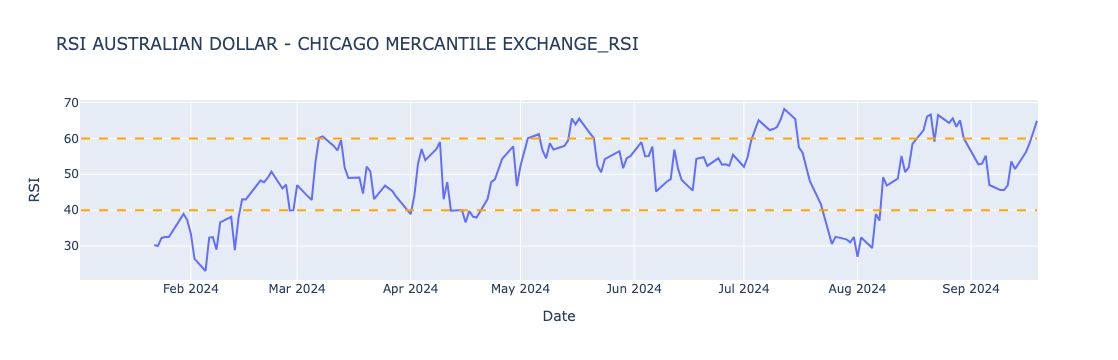

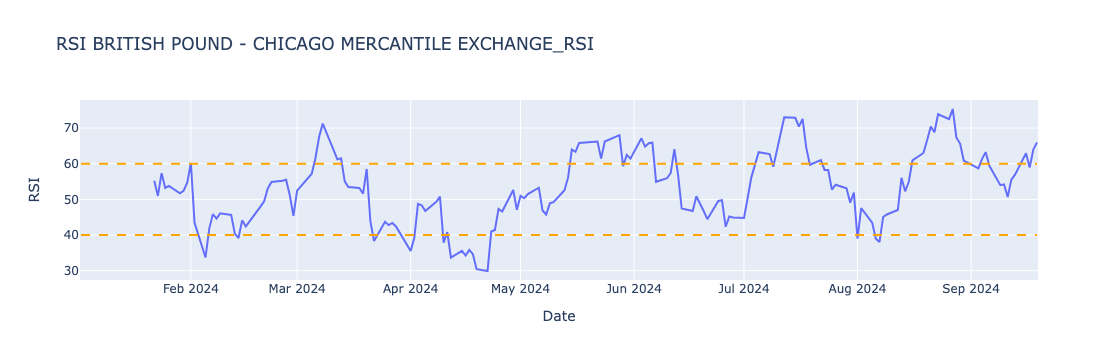

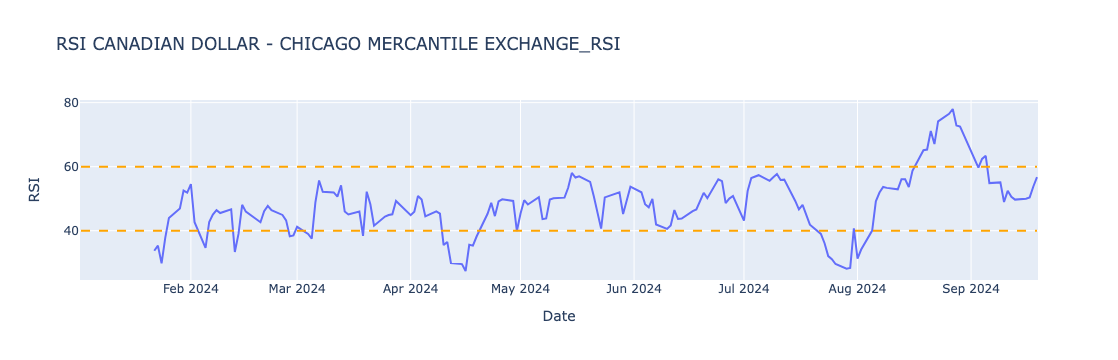

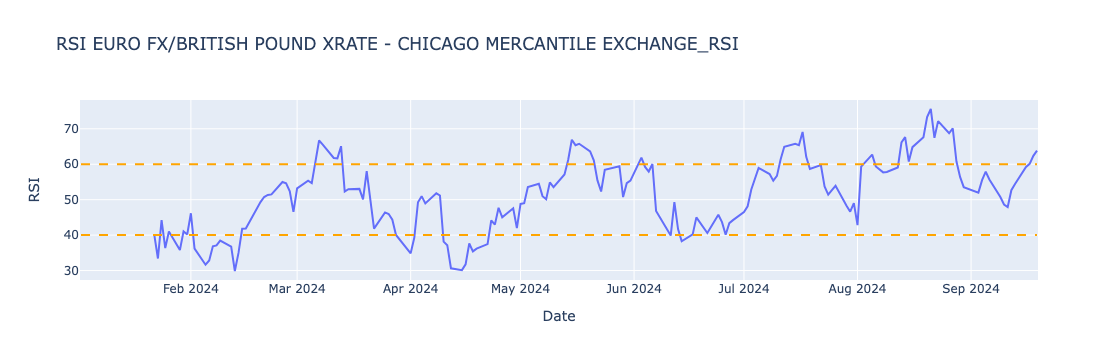

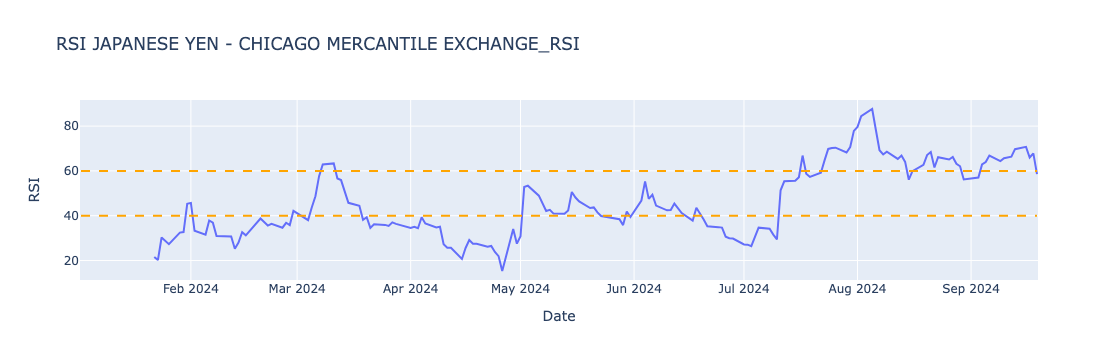

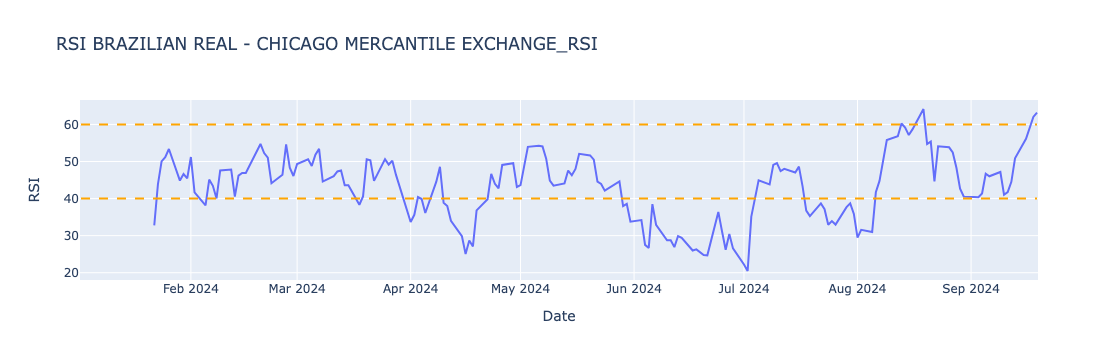

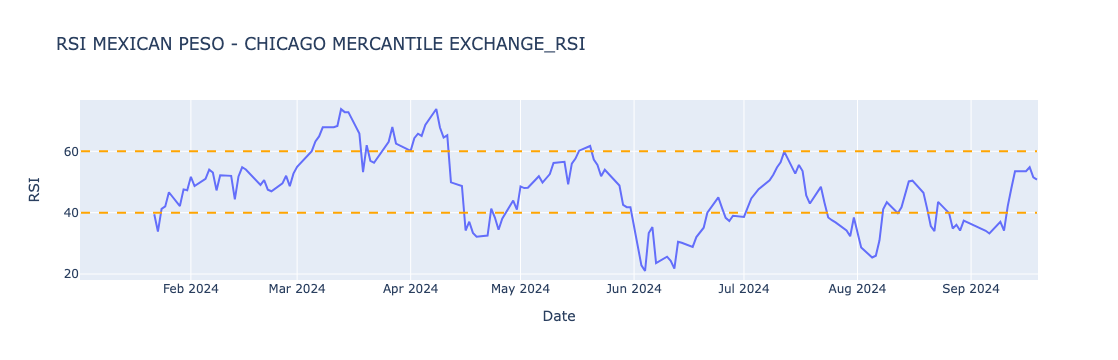

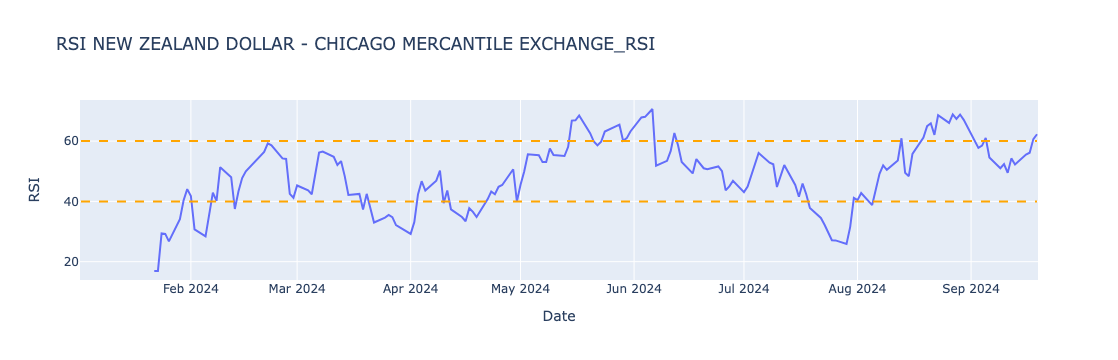

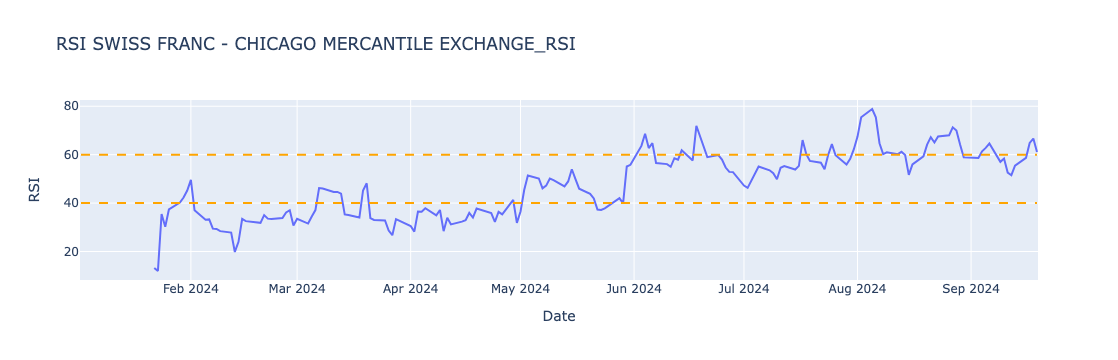

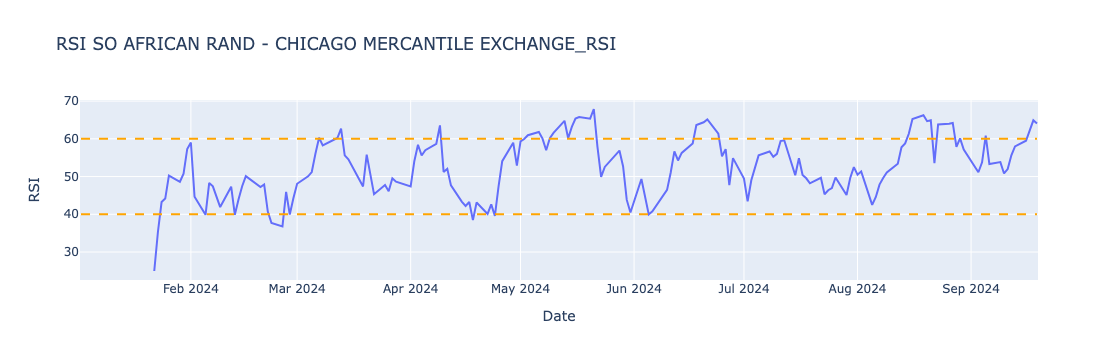

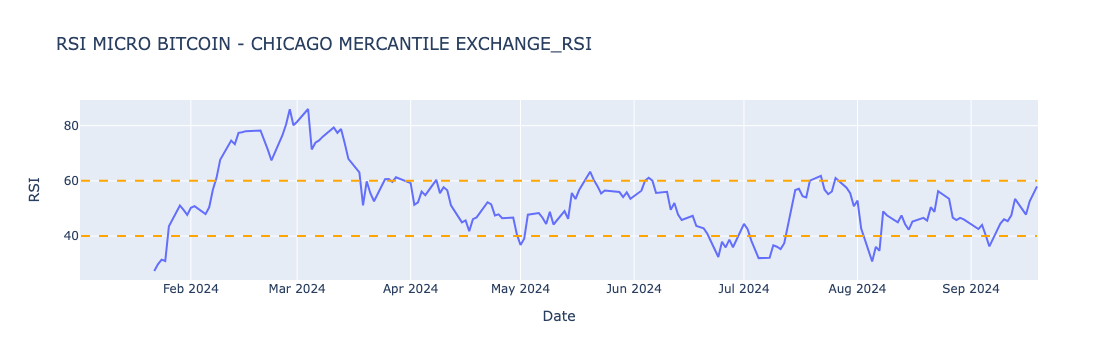

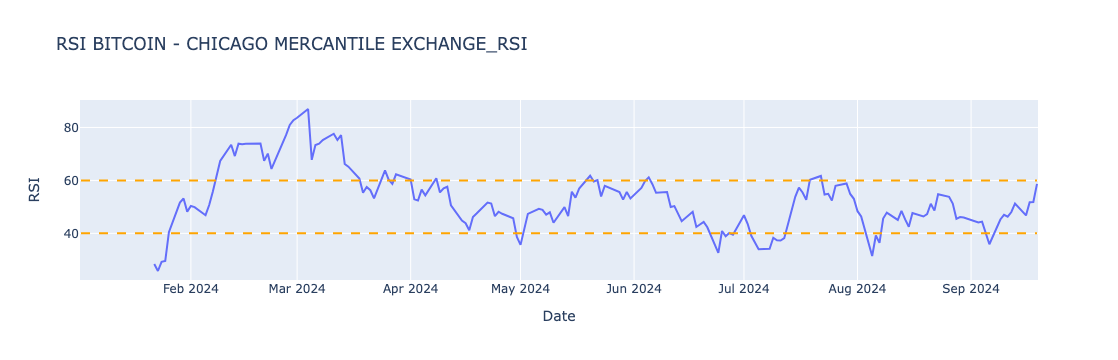

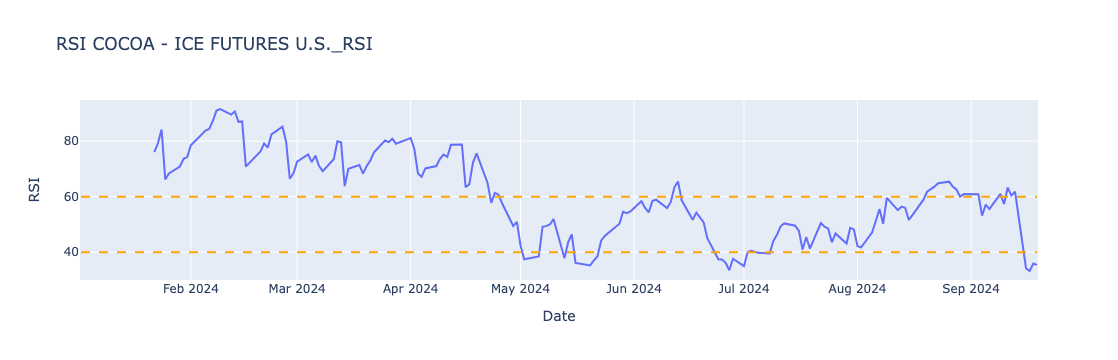

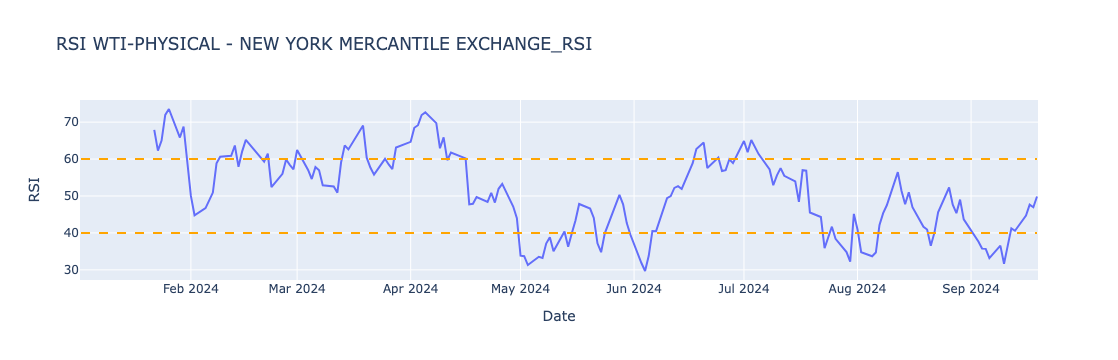

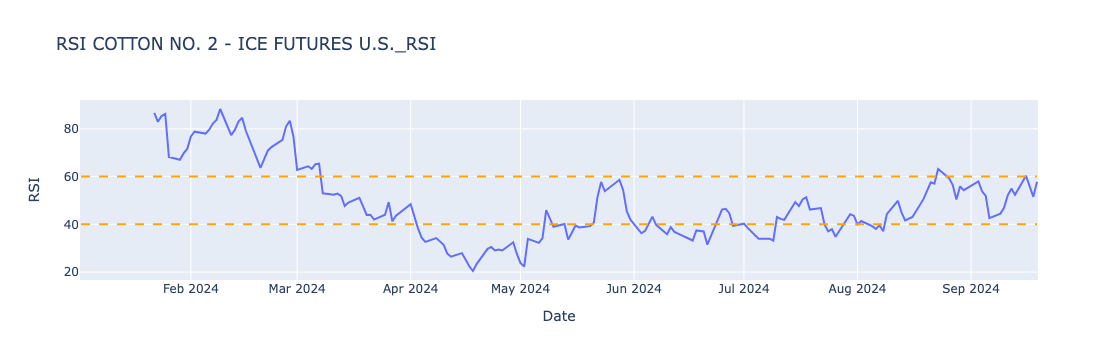

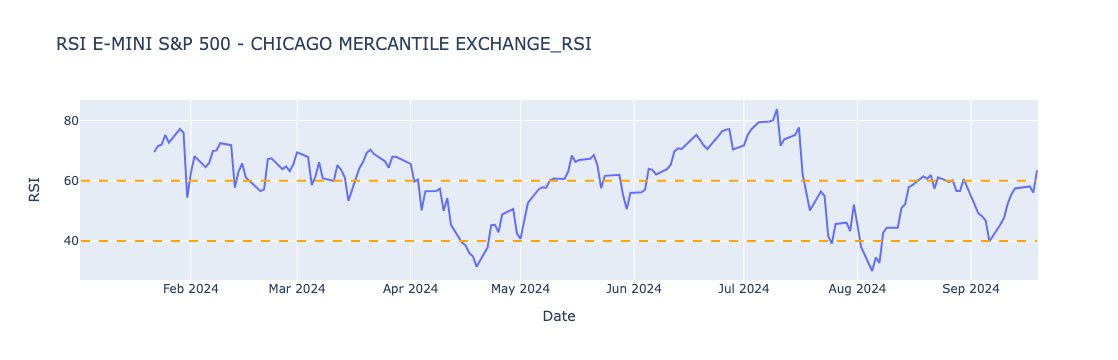

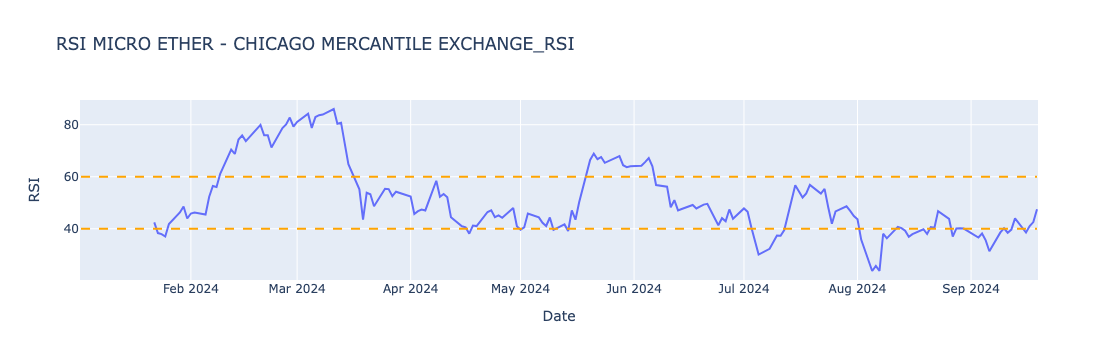

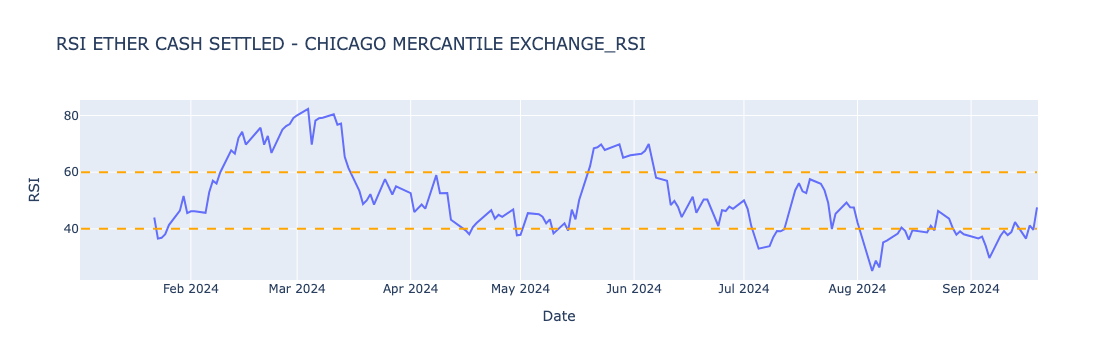

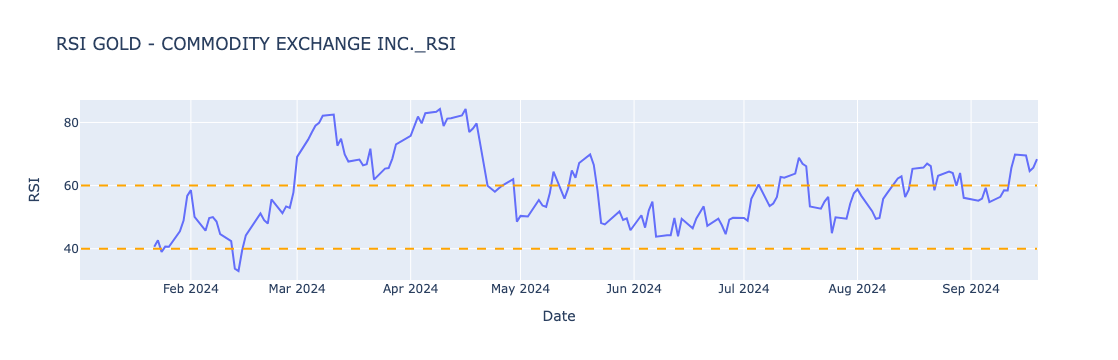

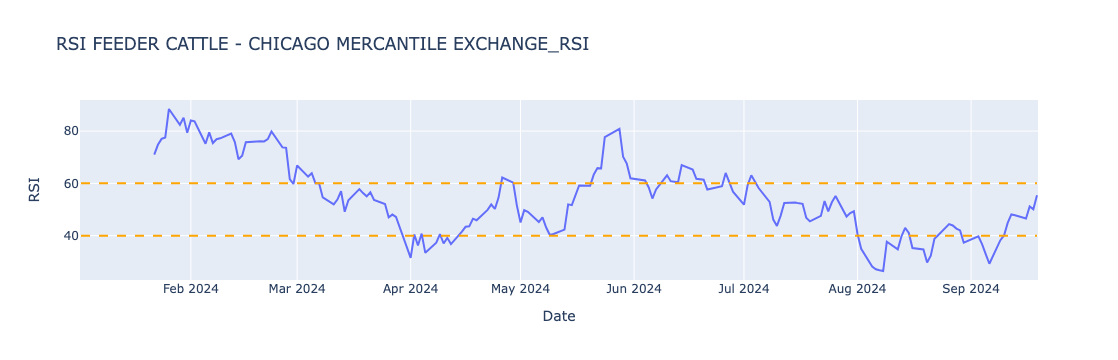

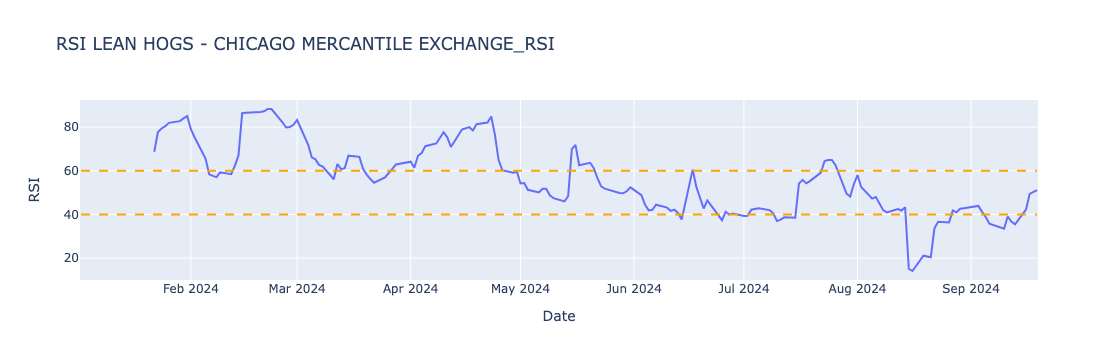

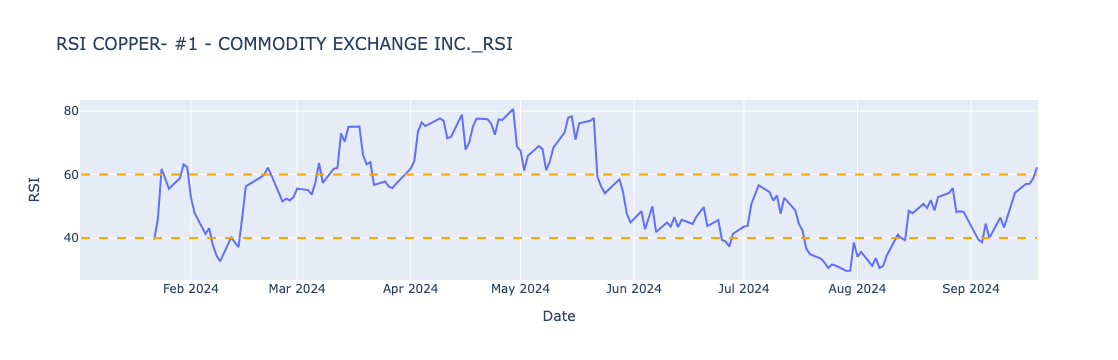

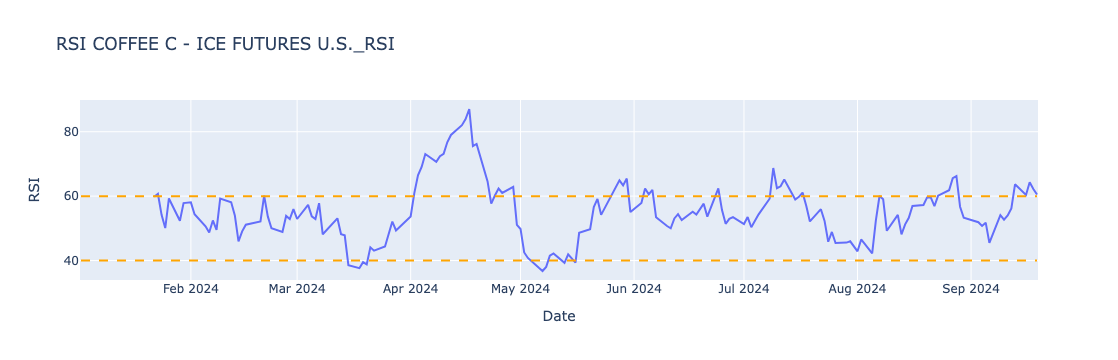

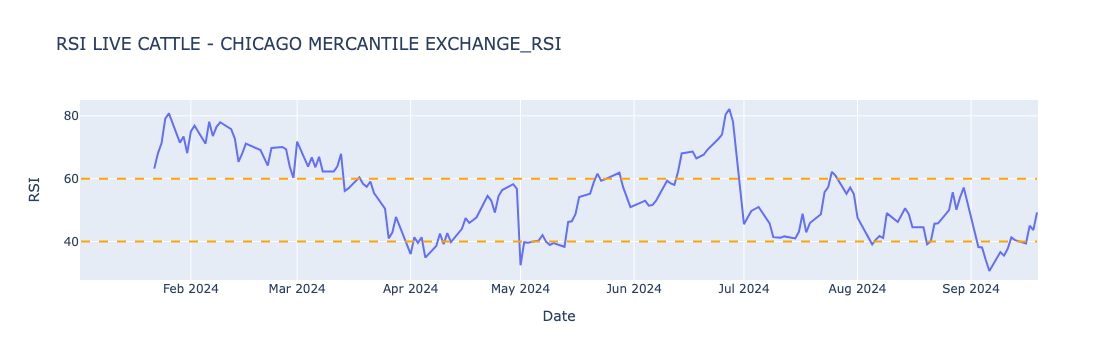

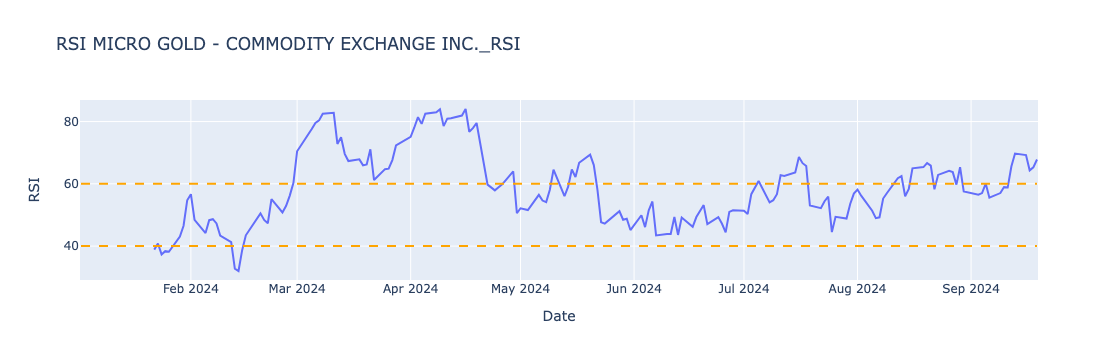

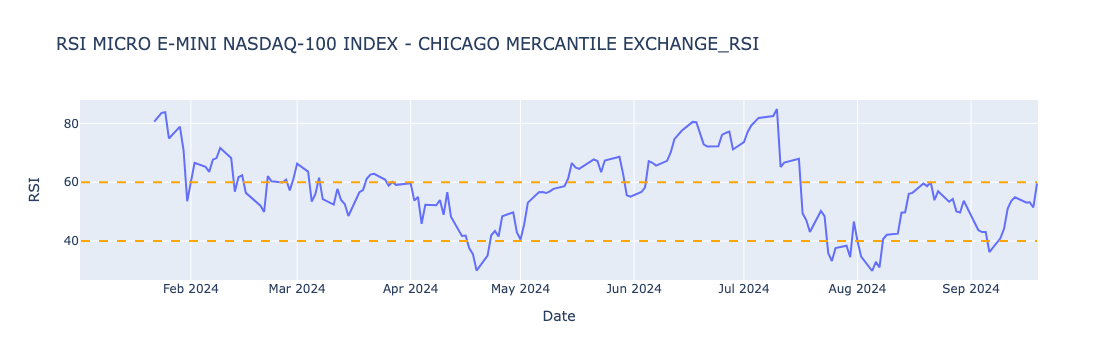

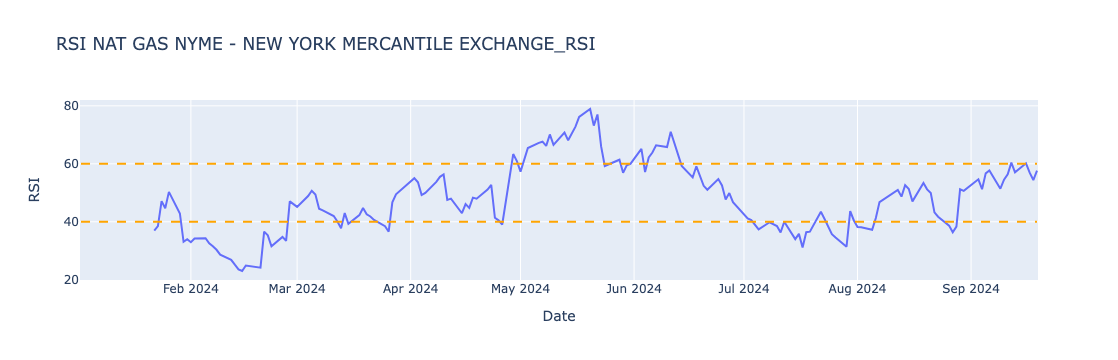

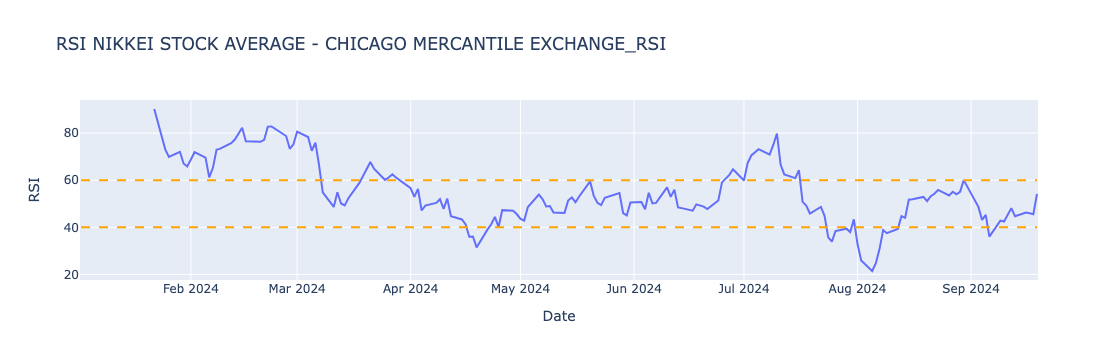

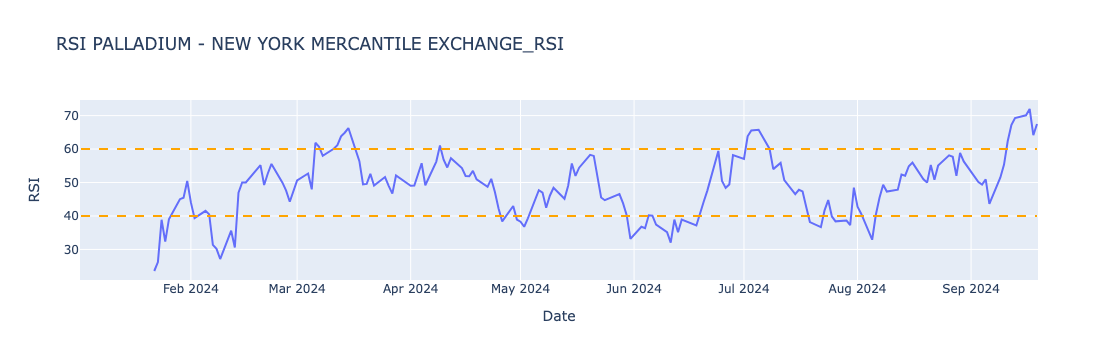

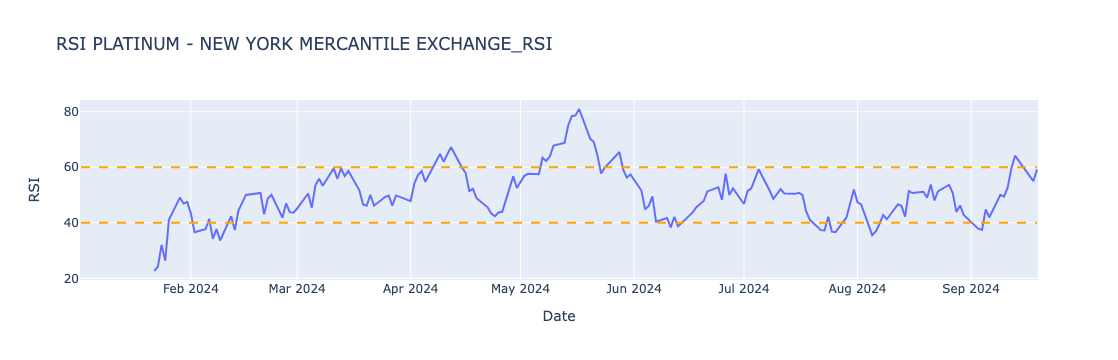

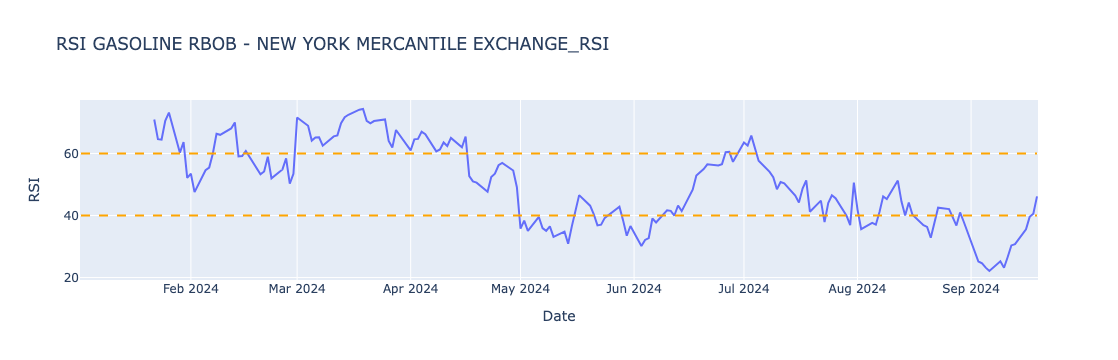

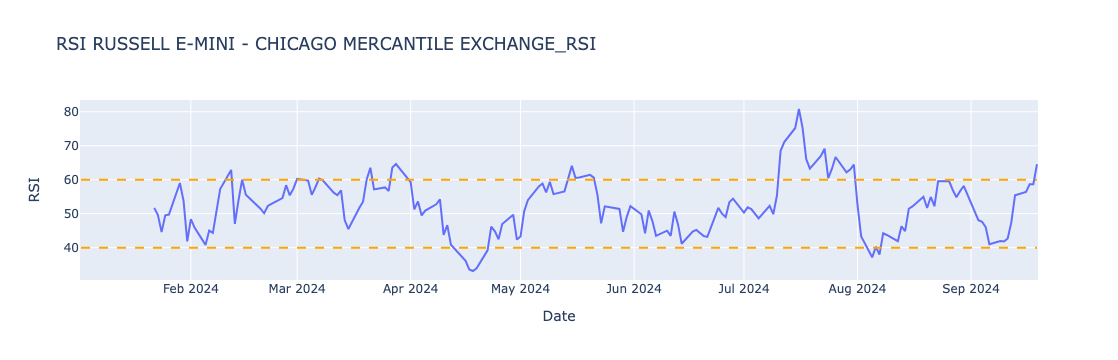

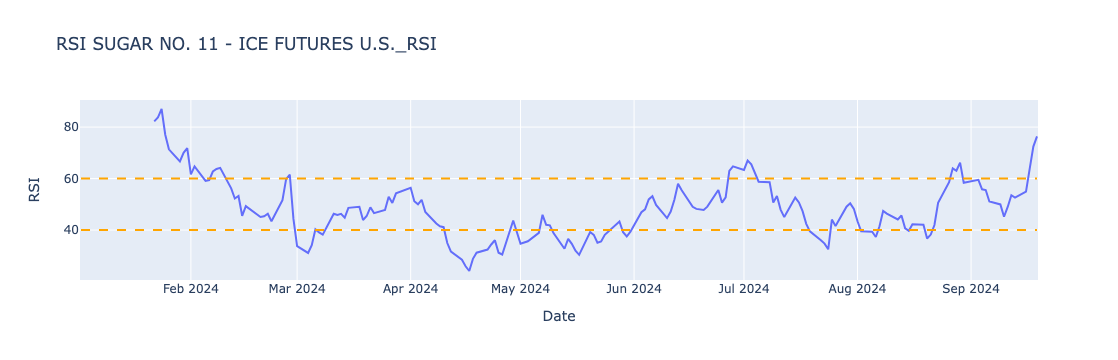

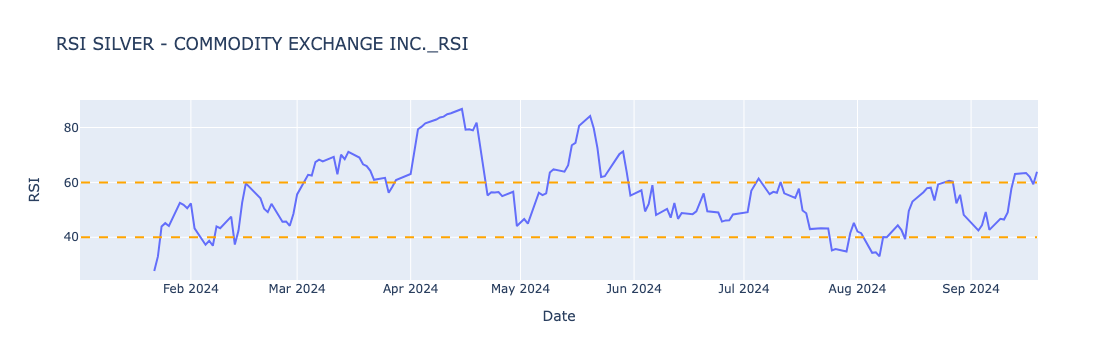

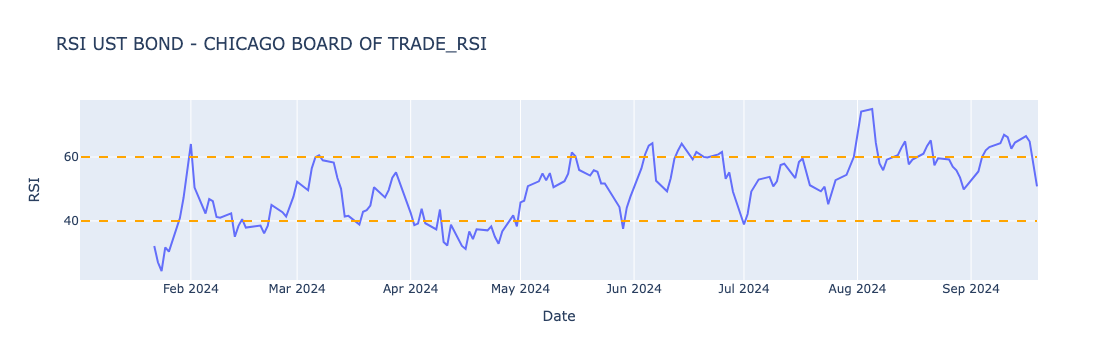

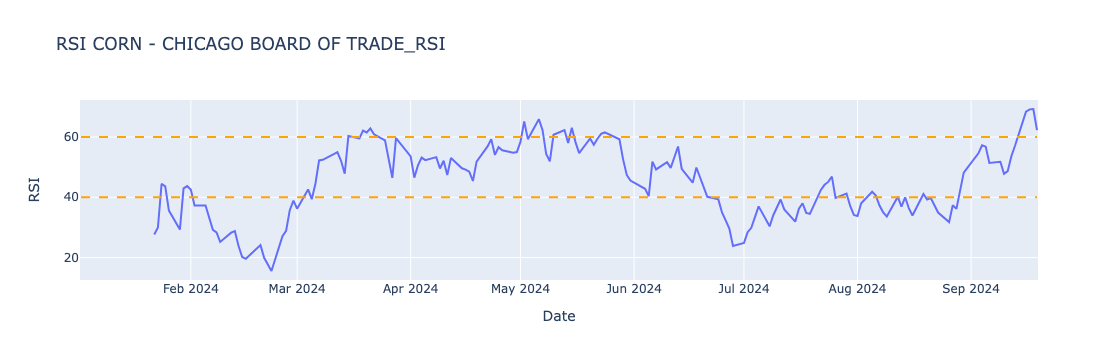

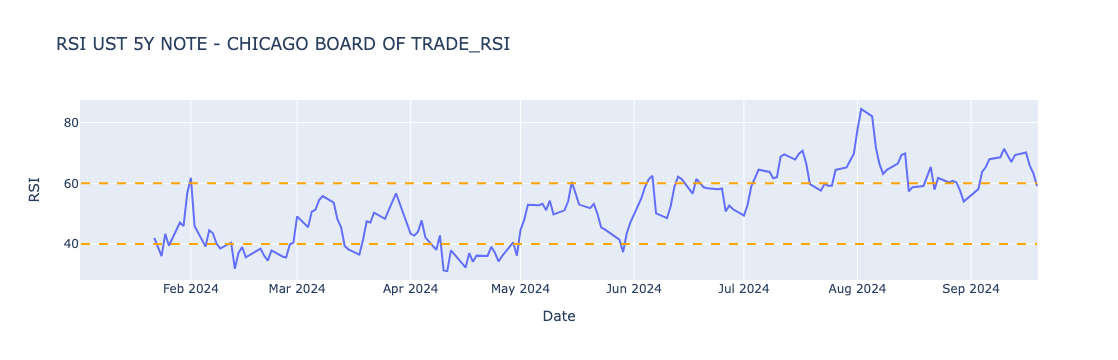

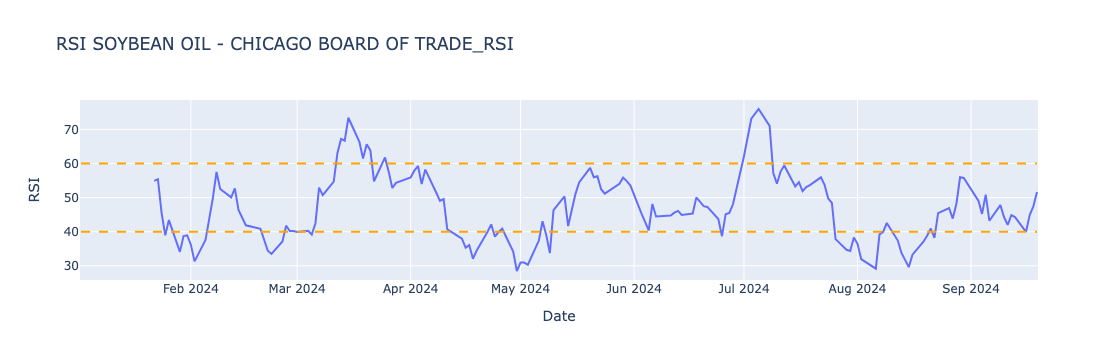

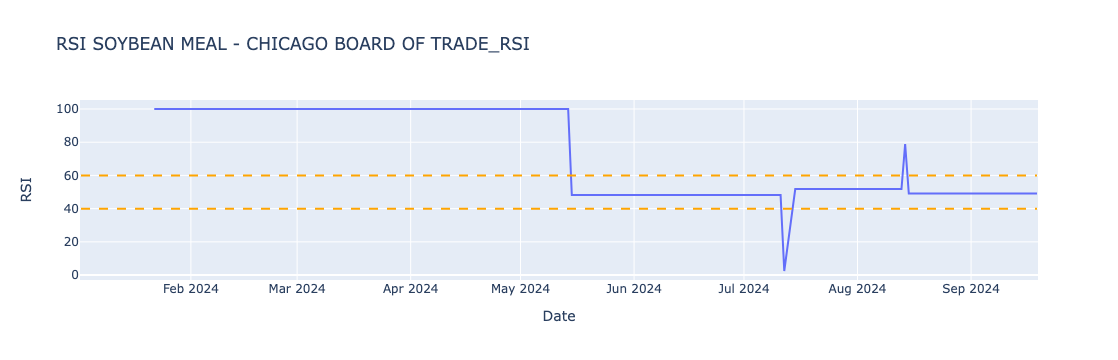

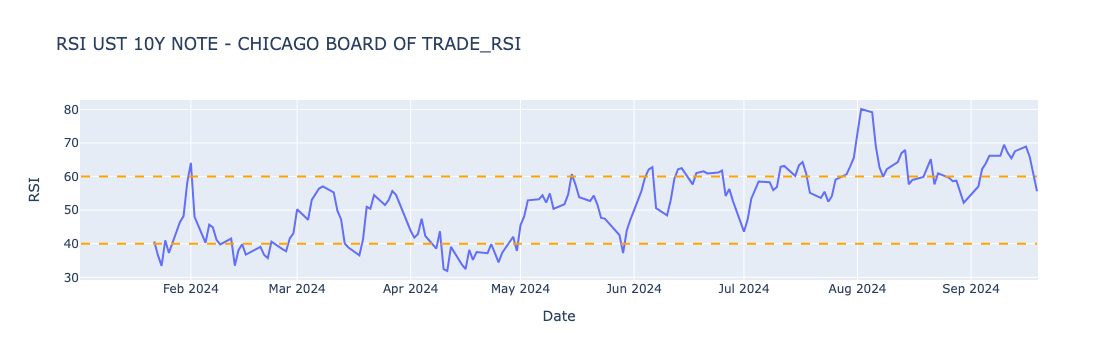

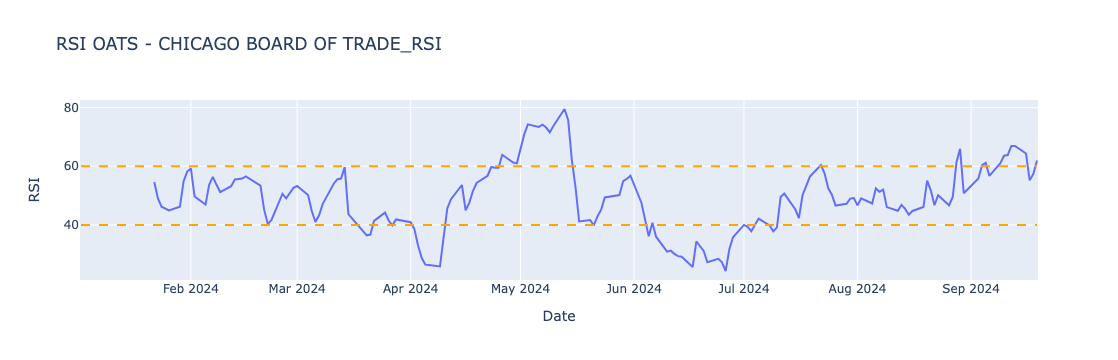

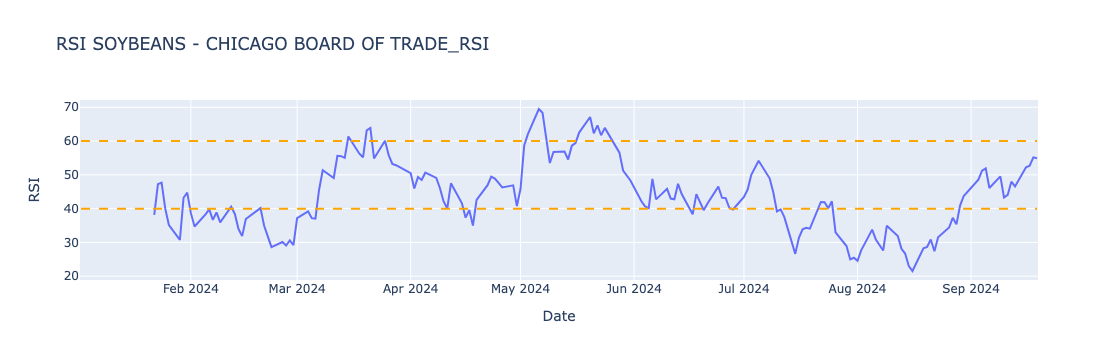

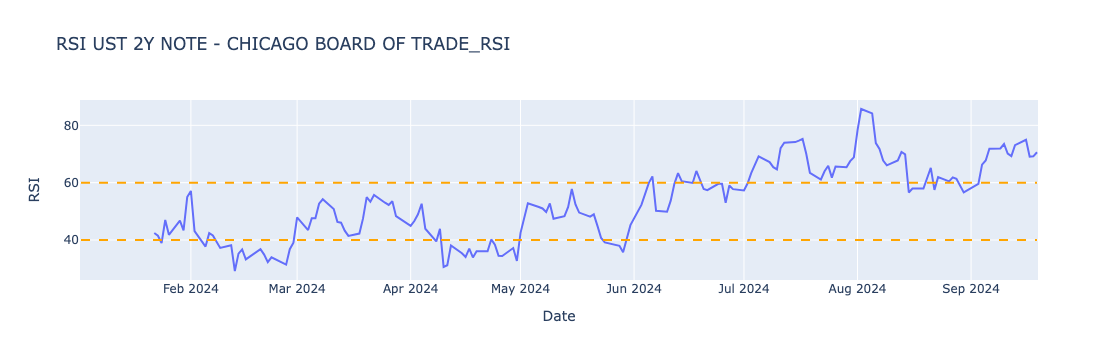

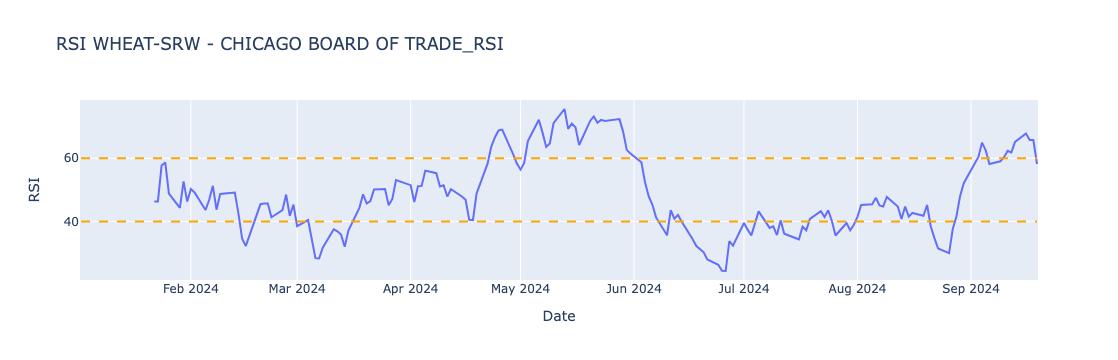

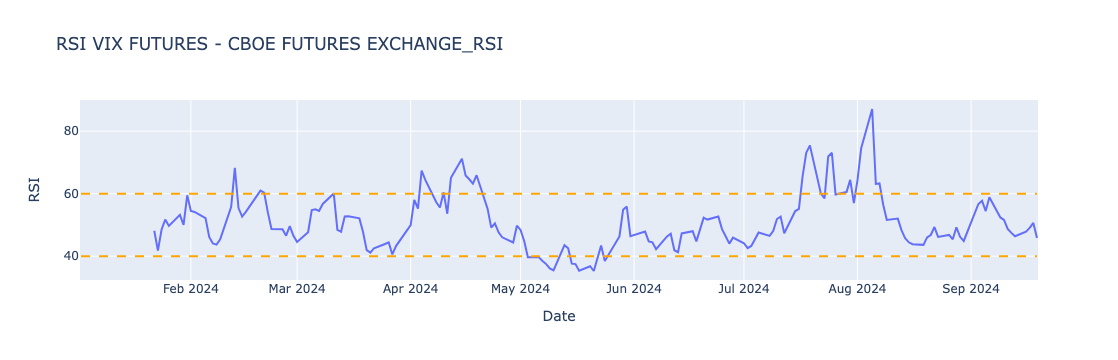

In [539]:
figures = {}

for cols in rsi.columns[1:]:
    
    # Create a Plotly figure
    fig = go.Figure()

    # Add a scatter trace for the market data
    fig.add_trace(go.Scatter(x=rsi["Date"], y=rsi[cols], mode='lines', name=cols))

    high_value = 60
    low_value = 40

    # Add horizontal lines as shapes
    fig.update_layout(shapes=[
        dict(
            type='line',
            x0=rsi["Date"].min(),
            x1=rsi["Date"].max(),
            y0=high_value,
            y1=high_value,
            line=dict(color='orange', dash='dash')
        ),
        dict(
            type='line',
            x0=rsi["Date"].min(),
            x1=rsi["Date"].max(),
            y0=low_value,
            y1=low_value,
            line=dict(color='orange', dash='dash')
        )
    ])

    # Set the title and axis labels
    fig.update_layout(
        title=f'RSI {cols}',
        xaxis_title='Date',
        yaxis_title='RSI',
        autosize=True
    )

    figures['Market'] = fig

    fig.show()